In [49]:
# The Olivetti faces datsset 올리베티 얼굴 데이터셋
# 1992~1994 AT&T와 캠브리지 대학 전산 연구실에서 공동으로 제작한 얼굴 사진 데이터베이스
# 40명의 흑백 얼굴 사진 400장, 4096(64*64) 특성
# 0.0~1.0 (0~255를 스케일링)

from sklearn.datasets import fetch_olivetti_faces

faces=fetch_olivetti_faces()

print(len(faces.data)) # 40명 400장의 흑백 이미지
print(set(faces.target))

400
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}


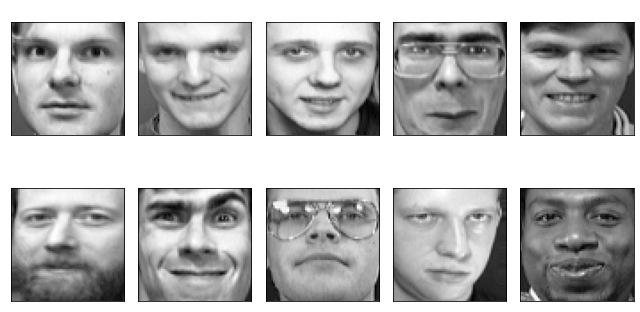

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

N, M=2, 5 # 2행 5열
np.random.seed(0)
fig=plt.figure(figsize=(9,5))
klist=np.random.choice(range(len(faces.data)), N*M)
for i in range(N):
    for j in range(M):
        k=klist[i*M+j]
        ax=fig.add_subplot(N,M,i*M+j+1)
        ax.imshow(faces.images[k], cmap=plt.cm.gray)
        ax.grid(False)
        ax.xaxis.set_ticks([]) # x축 눈금 제거
        ax.yaxis.set_ticks([]) # y축 눈금 제거
        plt.title(faces.target[k], color='white')

plt.tight_layout() # 여백 조절
plt.show()

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(faces.data, faces.target, stratify=faces.target,
test_size=0.2, random_state=0)

In [52]:
from sklearn.svm import SVC
svc=SVC().fit(X_train, y_train)

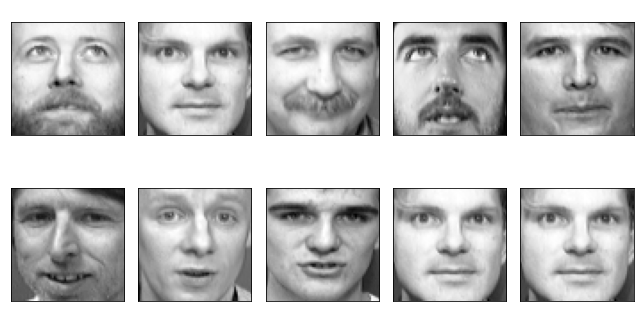

In [53]:
N, M=2, 5
np.random.seed(4)
fig=plt.figure(figsize=(9,5))
klist=np.random.choice(range(len(y_test)), N*M)
for i in range(N):
    for j in range(M):
        k=klist[i*M+j]
        ax=fig.add_subplot(N,M,i*M+j+1)
        ax.imshow(X_test[k:(k+1), :].reshape(64,64), cmap=plt.cm.gray)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        pred=svc.predict(X_test[k:(k+1), :])[0]
        plt.title(f'{y_test[k]} → {pred}', color='white')

plt.tight_layout()
plt.show()

In [54]:
print("학습용 :", svc.score(X_train, y_train))
print("검증용 :", svc.score(X_test, y_test))

학습용 : 1.0
검증용 : 0.95


In [55]:
from sklearn.metrics import confusion_matrix
y=[1,0,1,1,0,1]
pred=[0,0,1,1,0,1]
cm=confusion_matrix(y,pred)
print(cm)
# TN(True Negative) : 0을 0으로 맞춘 경우
# FP(False Positive) : 0인데 1로 틀린 경우
# FN(False Negative) : 1인데 0으로 틀린 경우
# TP(True Positive) : 1을 1로 맞춘 경우
tn,fp,fn,tp=confusion_matrix(y,pred).ravel()
print(tn,fp,fn,tp)

[[2 0]
 [1 3]]
2 0 1 3


In [56]:
# precision(정확도, 정밀도) : 모델이 True라고 분류한 것 중에서 실제 True의 비율

from sklearn.metrics import precision_score

y=[0,1,0,0]
pred=[0,1,1,0]

ps=precision_score(y, pred)
print(ps) # 모델이 2개를 1로 분류하였으나 실제 1인 개수는 1이므로 정밀도는 0.5

0.5


In [57]:
# recall(재현율, 검출율) : 실제값이 True인 것 중에서 모델이 True라고 예측한 것의 비율
# precision은 모델의 입장에서 recall은 실제 정답의 입장에서(바라보고자 하는 관점이 다름)
# 일반적으로 precision과 recall은 반비례 관계

from sklearn.metrics import recall_score

y=np.array([0,1,1,0])
pred=np.array([0,1,0,0])

recall_score(y, pred) # 실제값이 1인 개수 2, 모델이 1로 맞춘 개수 1

0.5

In [58]:
from sklearn.metrics import classification_report
# f1-score : precision과 recall의 조화평균(불균형 데이터셋에 많이 사용하는 평가 지표)
# 2*p*r/(p+r)
# support : 실제값의 개수 (0이 1개, 1이 3개)
# accuracy : 정확도
# macro avg : 단순평균(모든 클래스를 동일한 비중으로 고려)
# weighted avg : 각 클래스에 속하는 표본의 개수로 가중평균(f1-score와 같은 값)

y=np.array([0,1,1,1])
pred=np.array([0,1,0,0])

print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



In [62]:
pred=svc.predict(X_test)

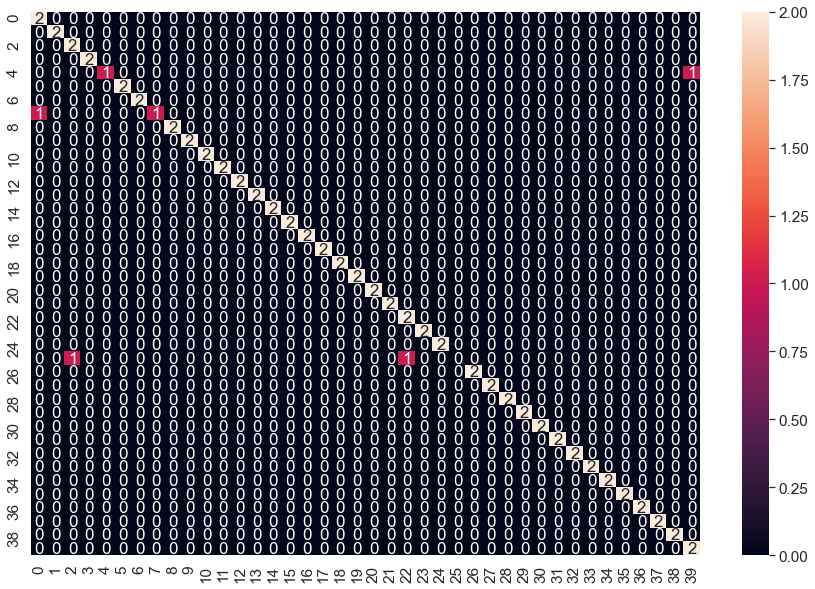

In [64]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import pandas as pd 

cm=confusion_matrix(y_test, pred) # 정오분류표
df_cm=pd.DataFrame(cm, index=range(0,40), columns=range(0,40)) # 데이터프레임으로 변환
sns.set(font_scale=1.4)
plt.figure(figsize=(15,10))
sns.heatmap(df_cm, annot=True)
plt.show()

In [61]:
pred=svc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
